# Computing distinct authors, publication venues, publications, and citations/references

In [3]:
publications_dict = dict();


with open("/Users/rohitnair/Downloads/acm.txt",'r', newline='', encoding="utf8") as acm:
    for row in acm:
        if row.startswith("#c"):
            ven = row[2:]
            if publications_dict.get((ven)) == None:
                publications_dict[ven] = 1
            else:
                publications_dict[ven] += 1

venue_list = list(publications_dict.keys())
venue_count = list(publications_dict.values())

print(venue_list[:10])
print(venue_count[:10])


['Integration, the VLSI Journal\n', 'International Journal of Parallel Programming\n', 'The computer comes of age\n', 'Information Sciences: an International Journal\n', 'Journal of the ACM (JACM)\n', 'Computability with Pascal\n', 'Information and Control\n', 'Computing\n', 'Software engineering with MODULA-2 and ADA\n', 'Computers and Artificial Intelligence\n']
[989, 668, 1, 5680, 3016, 1, 147, 1392, 1, 242]


In [5]:
refer_dict = {}
citattion_dict  = {}
with open("/Users/rohitnair/Downloads/acm.txt", 'r', newline='', encoding="utf8") as apfile:
    index = 0
    venue = ""
    for row in apfile:
        if row.startswith("#index"):
            index = int((row[6:]))
        elif row.startswith("#%"):
            if refer_dict.get(index) == None:
                refer_dict[index] = 1
            else:
                refer_dict[index] += 1

            if citattion_dict.get(int(row[2:])) == None:
                citattion_dict[int(row[2:])] = 1
            else:
                citattion_dict[int(row[2:])] += 1

                
                
                
print("Total references", len(refer_dict))
print("Total cites", len(citattion_dict))



v = list(refer_dict.values())
p = list(refer_dict.keys())
maxi = p[v.index(max(v))]
v2 = list(citattion_dict.values())
p2 = list(citattion_dict.keys())
maxi2 = p2[v2.index(max(v2))]
print("max references = " , p[v.index(max(v))])
print("max citations = " , p2[v2.index(max(v2))])



Total references 1040327
Total cites 1007495
max references =  2015217
max citations =  2135000


In [7]:


with open("/Users/rohitnair/Downloads/acm.txt", 'r', newline='', encoding="utf8") as apfile:
    for row in apfile:
        if row.startswith('#c'):
            string_temp = row[2:]
        if row.startswith('#index'):
            ind = row[6:]
            if int(ind) == int(maxi):
                print("max reference = " ,string_temp )
            if int(ind) == int(maxi2):
                print("max citations = " ,string_temp )


                
                

max reference =  ACM SIGOPS 24th Symposium on Operating Systems Principles

max citations =  INFORMS Journal on Computing



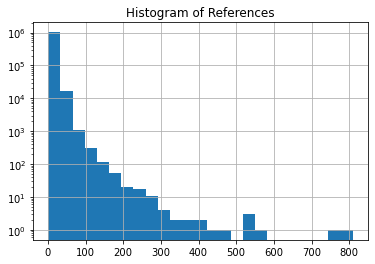

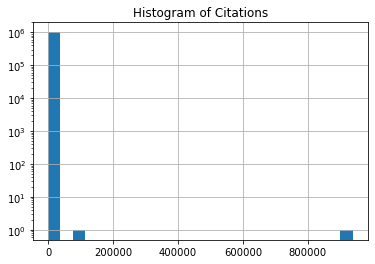

In [9]:

import matplotlib.pyplot as plt

plt.title('Histogram of References')
plt.grid(True)

plt.hist(list(refer_dict.values()),bins=25, log=True)
plt.show()


plt.title('Histogram of Citations')
plt.grid(True)

plt.hist(list(citattion_dict.values()),bins=25,log=True)
plt.show()



In [12]:

impact = {}
venue1 = {}
no_of_publ = {}
with open("/Users/rohitnair/Downloads/acm.txt", 'r', newline='', encoding="utf8") as apfile:
    for row in apfile:
        if row.startswith('#c'):
            venue_name = row[2:]
        if row.startswith('#index'):
            index_name = row[6:]
            if venue1.get(venue_name) == None:
                if citattion_dict.get(int(index_name)) == None:
                    #venue1[venue_name] = 0
                    continue
                else:
                    venue1[venue_name] = citattion_dict[int(index_name)]
            else:
                if citattion_dict.get(int(index_name)) == None:
                    #venue1[venue_name] = 0
                    continue
                else:
                    venue1[venue_name] += citattion_dict[int(index_name)]
            if no_of_publ.get(venue_name) == None:
                no_of_publ[venue_name] = 1
            else:
                no_of_publ[venue_name] += 1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



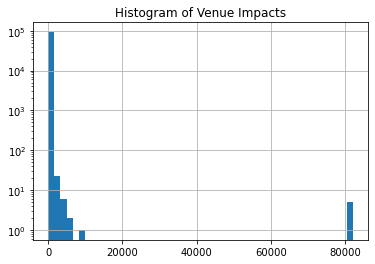

Venue with max impact =  Graphics Interface 1990



In [13]:

impact = {}
for i in venue1.keys():
    impact[i] = venue1[i]/no_of_publ[i]

#print(impact)

plt.title('Histogram of Venue Impacts')
plt.grid(True)

plt.hist(list(impact.values()),bins=50,log=True)
plt.show()

max_index = list(impact.values()).index(max(list(impact.values())))
print("Venue with max impact = " , list(impact.keys())[max_index])



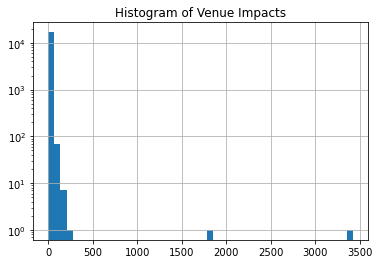

In [15]:

new_impact = {}
for i in venue1.keys():
    if no_of_publ[i] >= 10 :
        new_impact[i] = venue1[i]/no_of_publ[i]

#print(new_impact)

plt.title('Histogram of Venue Impacts')
plt.grid(True)

plt.hist(list(new_impact.values()),bins=50,log=True)
plt.show()

In [16]:

max_index = list(new_impact.values()).index(max(list(new_impact.values())))
print("Venue with max impact = " , list(new_impact.keys())[max_index])
print("citation count  = " ,list(venue1.values())[max_index])
temp_pub = sorted(list(venue1.values()))
middle = len(temp_pub)//2
median = (temp_pub[middle] + temp_pub[~middle]) / 2

print("median = ", median )


Venue with max impact =  Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining

citation count  =  3
median =  5.0


In [17]:

year_dict = {}

with open("/Users/rohitnair/Downloads/acm.txt",'r', newline='', encoding="utf8") as acm:
    for row in acm:
        if row.startswith('#t'):
            year = int(row[2:])
        if row.startswith('#c'):
            year_dict.setdefault(year, []).append(row[2:])
print("ok")
list.sort(p2)
total_cit_in_each_year = {}
total_ref_in_each_year = {}

ok


In [20]:
with open("/Users/rohitnair/Downloads/acm.txt",'r', newline='', encoding="utf8") as acm:
    for row in acm:
        if row.startswith('#t'):
            year2 = int(row[2:])
        if row.startswith('#index'):
            if total_ref_in_each_year.get(year2) == None:
                total_ref_in_each_year[year2] = 1
            else:
                total_ref_in_each_year[year2] += 1
            #print(total_ref_in_each_year[year2])
            if total_cit_in_each_year.get(year2) == None:
                if citattion_dict.get(int(row[6:])) != None:
                    total_cit_in_each_year[year2] = citattion_dict[int(row[6:])]
            else:
                if citattion_dict.get(int(row[6:])) != None:
                    total_cit_in_each_year[year2] += citattion_dict[int(row[6:])]

print(len(p2))
#print(total_cit_in_each_year)
#print(total_ref_in_each_year)

myKeysq = list(total_ref_in_each_year.keys())
myKeysq.sort()
sorted_dict = {i: total_ref_in_each_year[i] for i in myKeysq}

myKeysw = list(total_cit_in_each_year.keys())
myKeysw.sort()
sorted_dict2 = {i: total_cit_in_each_year[i] for i in myKeysw}


1007495


[1936, 1941, 1947, 1949, 1950]
73
68


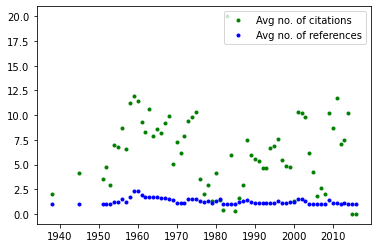

In [21]:

temp = []
for i in sorted_dict.keys():
    if sorted_dict2.get(i) == None:
        temp.append(i)

print(temp)
for i in temp:
    del sorted_dict[i]

for i in temp:
    del total_ref_in_each_year[i]

x = list(total_ref_in_each_year.keys())
y1 = list(total_ref_in_each_year[year]/len(year_dict[year]) for year in sorted_dict.keys() )
y2 = list(total_cit_in_each_year[year]/len(year_dict[year]) for year in sorted_dict2.keys() )

#print(y1)
#print(y2)

print(len(myKeysq))
print(len(myKeysw))


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y2, 'g.', label='Avg no. of citations')
ax.plot(x, y1, 'b.', label='Avg no. of references')

legend = ax.legend(loc='upper right')

plt.show()
